<a href="https://colab.research.google.com/github/mark3000-010701/The-study-proposes-machine-learning-methods-in-structural-damage-detection/blob/main/NCKH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mục mới

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D,Conv1D
from keras.layers import Input
from keras.models import Model
from keras.layers import MaxPool2D,MaxPool1D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from sklearn.model_selection import train_test_split
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image

from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

from google.colab import drive
drive.mount('/content/drive')

link = '/content/drive/MyDrive/Colab Notebooks/b/'

data_da = []
for i in range(1,289):
  b = 'Da_' + str(i)+ '.png'
  b = link + b
  img = Image.open(b)
  img = np.asanyarray(img)
  data_da.append(img)

data_da = np.array(data_da)
type(data_da)

label_da = np.ones(288)
label_da = label_da.reshape(-1,1)

data_un = []
for i in range(1,289):
  b = 'Da_' + str(i)+ '.png'
  b = link + b
  img = Image.open(b)
  img = np.asanyarray(img)
  data_un.append(img)

data_un = np.array(data_un)

label_un = np.zeros(288)
label_un = label_un.reshape(-1,1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(576, 1)

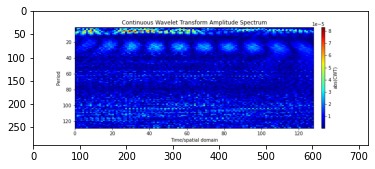

In [ ]:
x_train = np.concatenate((data_da,data_un),axis=0)
x_train.shape

plt.imshow(x_train[0])

y_train = np.concatenate((label_da,label_un),axis=0)
y_train.shape

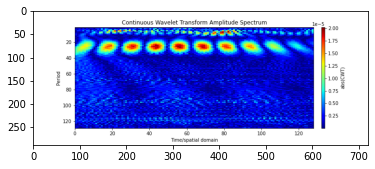

In [ ]:
from sklearn.utils import shuffle

x_train,y_train = shuffle(x_train,y_train)

plt.imshow(x_train[0])

y_train[0]

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.25)

In [ ]:
x_train = x_train.astype('float32')/255.0
x_val = x_val.astype('float32')/255.0

y_train = np_utils.to_categorical(y_train,2)
y_val = np_utils.to_categorical(y_val,2)

y_train[0]

x_train.shape

x_val.shape

baseModel = VGG16(weights=None,include_top=False,input_tensor=Input(shape=(288,720,4)))

fcHead = baseModel.output

fcHead = Flatten(name='flatten')(fcHead)

fcHead = Dense(256, activation='relu')(fcHead)
fcHead = Dropout(0.3)(fcHead)

fcHead = Dense(2, activation='softmax')(fcHead)

model = model = Model(inputs=baseModel.input, outputs=fcHead)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 288, 720, 4)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 288, 720, 64)      2368      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 288, 720, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 144, 360, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 144, 360, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 144, 360, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 72, 180, 128)      0     

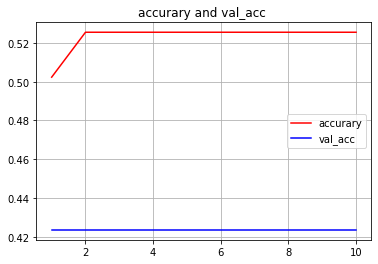

<Figure size 432x288 with 0 Axes>

In [ ]:
model.summary()

for layer in baseModel.layers:
  layer.trainable = False

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=5)

for layer in baseModel.layers[15:]:
  layer.trainable = True

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=10)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'r',label='accurary')
plt.plot(epochs,val_acc,'b',label='val_acc')
plt.title("accurary and val_acc ")
plt.legend()
plt.grid()
plt.figure()
plt.show()

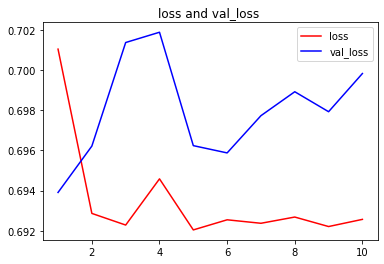

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'r',label='loss')
plt.plot(epochs,val_loss,'b',label='val_loss')
plt.title("loss and val_loss ")
plt.legend()
plt.figure()
plt.show()


In [ ]:
model.save("NCKH_1.h5")

In [ ]:
from tensorflow.keras import models

new_model = models.load_model('NCKH_1.h5')

test_da = []
for i in range(230,288):
  b = 'Da_' + str(i)+ '.png'
  b = link + b
  img = Image.open(b)
  img = np.asanyarray(img)
  test_da.append(img)

test_da = np.array(test_da)

label_test_da = np.ones(58)
label_test_da = label_test_da.reshape(-1,1)

test_un = []
for i in range(230,288):
  b = 'Da_' + str(i)+ '.png'
  b = link + b
  img = Image.open(b)
  img = np.asanyarray(img)
  test_un.append(img)

test_un = np.array(test_un)

label_test_un = np.zeros(58)
label_test_un = label_test_un.reshape(-1,1)

In [ ]:
x_test = np.concatenate((test_da,test_un),axis=0)
x_test.shape

y_test = np.concatenate((label_test_da,label_test_un),axis=0)
y_test.shape

(116, 1)

In [ ]:
from sklearn.utils import shuffle

x_test,y_test = shuffle(x_test,y_test)

x_test = x_test.astype('float32')/255.0

y_test = np_utils.to_categorical(y_test,2)

loss_score,acc_score = new_model.evaluate(x_test,y_test,verbose=0)

acc_score

loss_score

classnames = {
    0 : 'khong hong',
    1 : 'hong'
}

y_test[0]

y_predict0 = new_model.predict(x_test[0].reshape(1,420,560,3))

classnames[np.argmax(y_predict0)]

y_predict91 = new_model.predict(x_test[91].reshape(1,420,560,3))
classnames[np.argmax(y_predict91)]

y_test[91]


ValueError: ignored

TclError: ignored